In [1]:
from Define_System import system
from Define_Slater_Circuit import slater_circ
from Define_Measurment_Circuits import create_circs
from Define_Quantum_Device import Quantum_Device
from Define_Analyzers import analyze_energy
from Define_Lancozos import Lancozos

In [2]:
systemQ = system('square',4) 
Fd = systemQ.Fld()
paulis = systemQ.pauli_strings()
circs = create_circs(Fd,paulis)
QD = Quantum_Device(layout = [0,1,3,5])

results = QD.get_results(circs, method = 'matrix')
results = QD.chop_results(results)

#save_id_file = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/Job_id_main_post_select"
#results = QD.get_results(circs, method = 'quantum', save_id_file = save_id_file)

# Save and Load

In [3]:
#import pickle
#fpath = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/"

#file_to_store = open(fpath + "main_line_4_lagos.pickle", "wb")

#pickle.dump(results, file_to_store)

In [4]:
#import pickle
#fpath = "/Users/stenger/Documents/Research/Hubbard_symmetries/Gutzwiller/Data/"

#file_to_read = open(fpath + "main_line_4_lagos.pickle", "rb")

#loaded_results = pickle.load(file_to_read)

# Plots

In [5]:
import numpy as np

paulis = systemQ.pauli_strings()
F = systemQ.Fl()
#psi_spin = systemQ.psi_spin([1,2])
psi_spin = systemQ.psi_spin([2,3])
#psi_spin = systemQ.psi_spin([3,4])
#psi_spin = systemQ.psi_spin([6,7])

#parameters
u = 0
k = 1
d = 0

#Exact Eigenvalue
H = systemQ.H(k,u,d)
e0 = Lancozos(H,20)[0]
#e,y = np.linalg.eig(H)
#y = np.transpose(y)
#arg = np.argsort(e)

#Scan
eg = []
gl = []
eT = []
for gi in range(-10,10):
    g = gi
    egl = analyze_energy(g,u,k,d,paulis,results)
    eg.append(egl)
    gl.append(g)
    eT.append(e0)
    #eT.append(e[arg[[0]]])

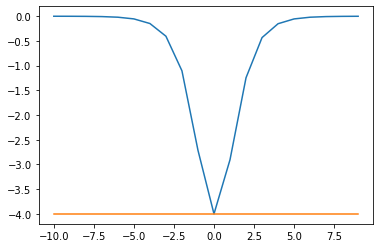

In [6]:
import matplotlib.pyplot as plt

plt.plot(gl,eg)
plt.plot(gl,eT)

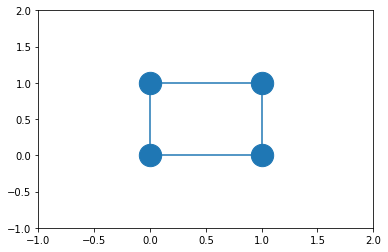

In [7]:
systemQ.draw()

# Tests

In [8]:
from Define_Slater_Circuit import givens, phase_offset
import numpy as np
from qiskit import quantum_info as qi


qc = slater_circ(Fd)
psi_tst = qi.Statevector.from_instruction(qc).data
#psi1 = systemQ.psi1([1,2])
psi1 = systemQ.psi1([2,3])
#psi1 = systemQ.psi1([3,4])
phase = phase_offset(Fd)
np.amax(np.abs( psi_tst - phase*psi1 ))

2.262266701886419e-16

In [9]:

results = QD.normalize_results(results)

In [10]:
from Define_Paulis import bkt,Mdot
from Define_Analyzers import analyze_GG, analyze_GMG, analyze_GDG, analyze_GKG
g = 1.1
m = 2.1
k = 1.6
d = 0.7
G = systemQ.G(g)
D = systemQ.D(d)
M = systemQ.M(m)
K = systemQ.K(k)
#psi_spin = systemQ.psi_spin([1,2])
psi_spin = systemQ.psi_spin([2,3])
#psi_spin = systemQ.psi_spin([3,4])
GG = bkt(psi_spin,Mdot([G,G]),psi_spin)
GDG = bkt(psi_spin,Mdot([G,D,G]),psi_spin)
GKG = bkt(psi_spin,Mdot([G,K,G]),psi_spin)
GMG = bkt(psi_spin,Mdot([G,M,G]),psi_spin)
E = (GMG + GKG + GDG)/GG 
print(GG - analyze_GG(g,results[0]))
print(GDG - analyze_GDG(g,d,results[0]))
print(GMG - analyze_GMG(g,m,results[0]))
print(GKG - analyze_GKG(g,k,paulis,results))
print(E - analyze_energy(g,m,k,d,paulis,results))

(-3.0531133177191805e-16+0j)
(-1.0408340855860843e-16+0j)
(-2.4424906541753444e-15+0j)
(9.992007221626409e-16+0j)
0j
